In [42]:
# 1
import numpy as np
from scipy.integrate import quad

def f(x):
    return x*np.log(x)

xs = 0.01
xe = 1.00

def trap(f,xs,xe,npanel):
    a = np.linspace(xs,xe,2**(npanel-1)+1)
    h = np.diff(a)[0]
    return (2*sum(f(a))-f(a[0])-f(a[-1])) * h/2
R11 = trap(f,xs,xe,1)

R21 = trap(f,xs,xe,2)
R22 = (2**2 * R21 - R11) / (2**2 - 1) 

R31 = trap(f,xs,xe,3)
R32 = (2**2 * R31 - R21) / (2**2 - 1)
R33 = (2**4 * R32 - R22) / (2**4 - 1)

R41 = trap(f,xs,xe,4)
R42 = (2**2 * R41 - R31) / (2**2 - 1)
R43 = (2**4 * R42 - R32) / (2**4 - 1)
R44 = (2**8 * R43 - R33) / (2**8 - 1)

print(f'''
R11             | {R11}
R21 R22         | {R21}  {R22}
R31 R32 R33     | {R31}  {R32}  {R33}
R41 R42 R43 R44 | {R41} {R42} {R43} {R44}
Converged Integral Value : {quad(f,0.01,1)[0]}
Error ~ h^8 -> {h**8} << 1e-3   여기서 h 는 trap(f,xs,xe,4)에서의 h이다.
''')


R11             | -0.02279559242064105
R21 R22         | -0.18217992871577213  -0.23530804081414916
R31 R32 R33     | -0.2305156253197705  -0.24662752418776993  -0.24738215641267797
R41 R42 R43 R44 | -0.24448063945416607 -0.24913564416563125 -0.24930285216415535 -0.24931038430435723
Converged Integral Value : -0.24974474149069875
Error ~ h^8 -> 2.562890624999988e-07 << 1e-3   여기서 h 는 trap(f,xs,xe,4)에서의 h이다.



/usr/local/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


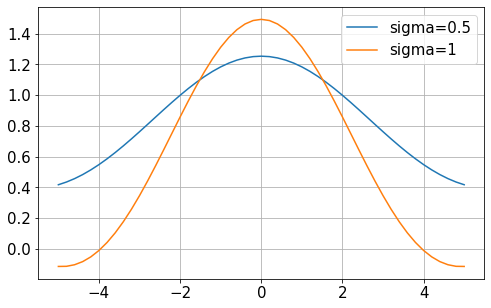

In [30]:
# 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
plt.rcParams["figure.figsize"] = (8,5)
plt.rcParams.update({'font.size': 15})
def gaussNodes(m,tol=10e-9):

    def legendre(t,m):
        p0 = 1.0; p1 = t
        for k in range(1,m):
            p = ((2.0*k + 1.0)*t*p1 - k*p0)/(1.0 + k )
            p0 = p1; p1 = p
        dp = m*(p0 - t*p1)/(1.0 - t**2)
        return p,dp
    A = np.zeros(m)
    x = np.zeros(m)
    nRoots = int((m + 1)/2) # Number of non-neg. roots
    for i in range(nRoots):
        t = np.cos(np.pi*(i + 0.75)/(m + 0.5))# Approx. root
        for j in range(30):
            p,dp = legendre(t,m) # Newton-Raphson
            dt = -p/dp; t = t + dt # method
            if abs(dt) < tol:
                x[i] = t; x[m-i-1] = -t
                A[i] = 2.0/(1.0 - t**2)/(dp**2) # Eq.(6.25)
                A[m-i-1] = A[i]
                break
    return x,A

def gaussQuad(f,a,b,m):
    c1 = (b + a)/2.0
    c2 = (b - a)/2.0
    x,A = gaussNodes(m)
    sum = 0.0
    for i in range(len(x)):
        sum = sum + A[i]*f(c1 + c2*x[i])
    return c2*sum

def fe(x):
    return 1/np.sqrt(sigma) * np.exp(-(x/sigma)**2) * np.exp(1j*k*x)

kr = np.linspace(-5,5,51)
Fk_sigma_5 = []
Fk_sigma_10 = []

for k in kr:
    sigma=0.5
    Fk_sigma_5.append(gaussQuad(fe,-1,1,5))
    sigma=1.
    Fk_sigma_10.append(gaussQuad(fe,-1,1,5))
    
plt.plot(kr,np.array(Fk_sigma_5),label='sigma=0.5')
plt.plot(kr,np.array(Fk_sigma_10),label='sigma=1')
plt.legend()
plt.grid()
plt.show()

In [47]:
# 3
import numpy as np
x = np.array([1.00, 1.15, 1.3, 1.45, 1.6])
fx = np.array([30.00, 38.55, 46.20, 52.95, 58.8])
h = np.diff(x)[0]

def simp(y,h):
    I1 = h*(y[0] + y[-1])
    I4 = 4*h*(sum(y[1::2]))
    I2 = 2*h*sum(y[2:-2:2])
    Itot = (I1 + I4 + I2)/3
    return Itot

print('simpson method :', simp(fx,h))

simpson method : 27.359999999999985
